<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-4df13306bf58>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### For the "Median value of owner-occupied homes" provide a boxplot:

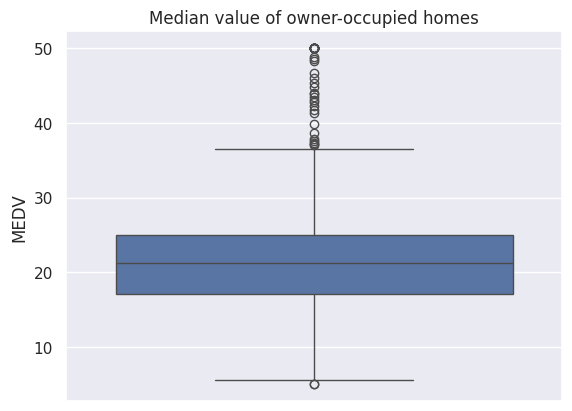

In [17]:
ax = sns.boxplot(y='MEDV', data=boston_df)
pyplot.title("Median value of owner-occupied homes")
pyplot.ylabel("MEDV")
pyplot.show()

#### Explain my findings: The median value is around 21. There is an minimal value of 5 and a maximal value of 50.

####

### Provide a  bar plot for the Charles river variable

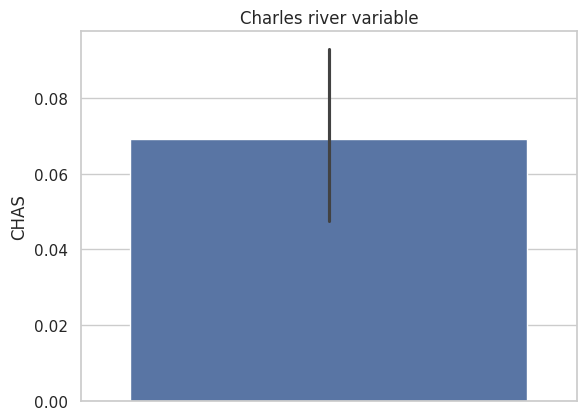

In [22]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(y="CHAS", data=boston_df)
pyplot.title("Charles river variable")
pyplot.ylabel("CHAS")
pyplot.show()

#### Explain my findings: The mean is around 0.07.

####

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

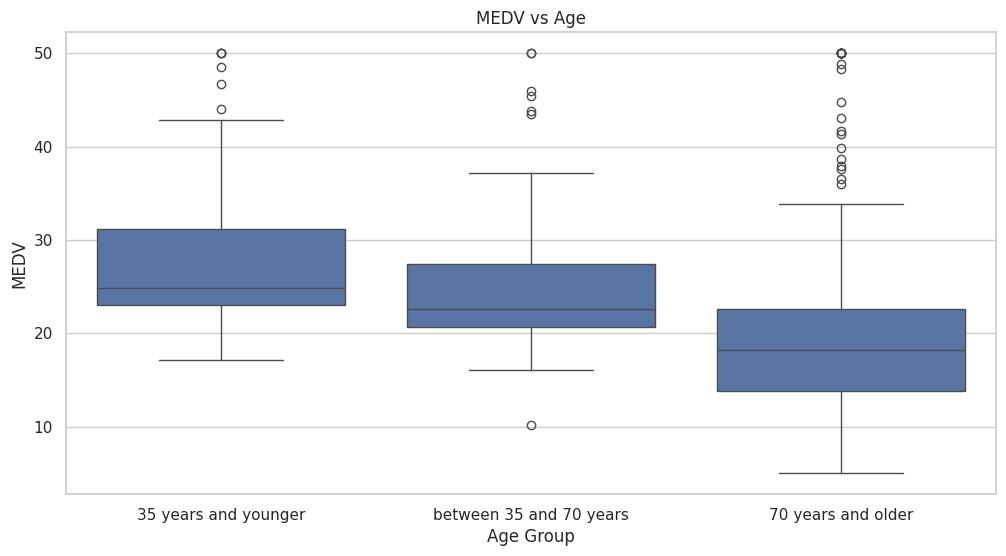

In [24]:
df = pd.DataFrame(boston_df)

# Make age groups
df['Age Group'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Plot the boxplot
pyplot.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='MEDV', data=df)
pyplot.title('MEDV vs Age')
pyplot.xlabel('Age Group')
pyplot.ylabel('MEDV')
pyplot.show()

#### Explain my findings: The older people are, the lower the MEDV-value.

####

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

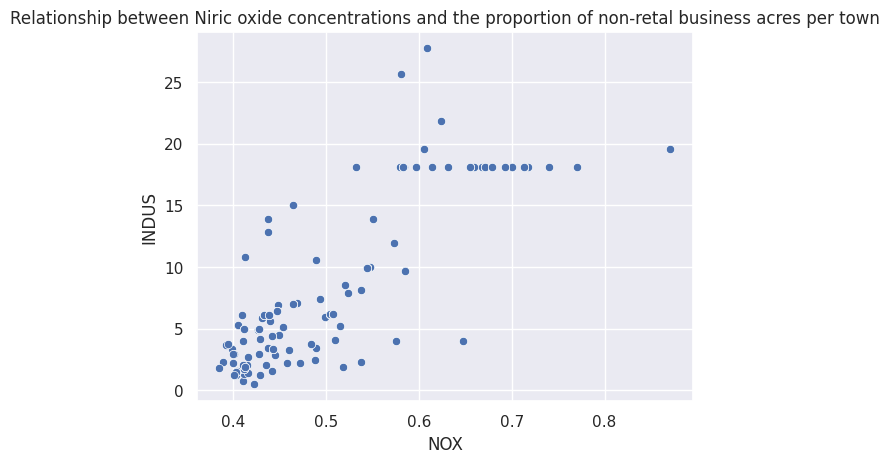

In [26]:
sns.set_theme(style="darkgrid")
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title("Relationship between Niric oxide concentrations and the proportion of non-retal business acres per town")
pyplot.xlabel("NOX")
pyplot.ylabel("INDUS")
pyplot.show()

#### Explain my findings: The higher the NOX-value the higher the proportion of non-retail business acres per town. But the most values lie between a NOX-value with a range from 0 - 0.5 to an INDUS value with a range of 0 to 8.

####

### Create a histogram for the pupil to teacher ratio variable

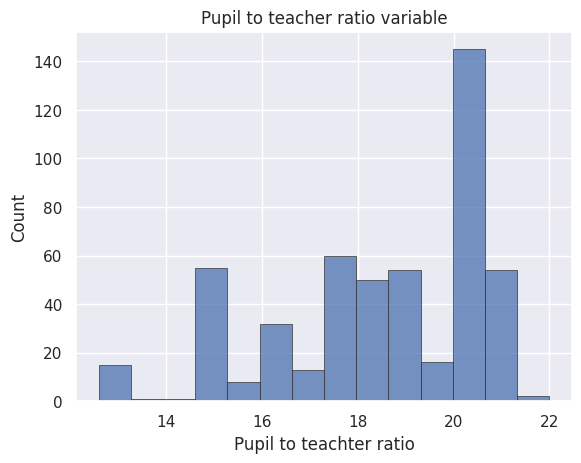

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [27]:
sns.set_theme(style="darkgrid")
sns.histplot(data=boston_df, x="PTRATIO", edgecolor=".2",linewidth=.5,)
pyplot.title("Pupil to teacher ratio variable")
pyplot.xlabel("Pupil to teachter ratio")
pyplot.show()
boston_df.describe()

#### Explain my findings: The most values of the pupil to teacher ratio lie between 20 and 21 

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#### null-hypothesis: There is not a significant difference in median value of houses bounded by the Charles river
#### alternative-hypothesis: There is a significant difference in median value of houses bounded by the Charles river

In [10]:
from scipy.stats import ttest_ind

df = pd.DataFrame(boston_df)

# Split the data into two groups
medv_river = df[df['CHAS'] == 1]['MEDV']
medv_no_river = df[df['CHAS'] == 0]['MEDV']

# Perform an independent samples t-test
t_stat, p_value = ttest_ind(medv_river, medv_no_river, equal_var=False)  # Welch's t-test

# Output the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the median value of houses bounded by the Charles River and those not bounded by the Charles River.")
else:
    print("There is no significant difference in the median value of houses bounded by the Charles River and those not bounded by the Charles River.")

T-statistic: 3.113291312794837
P-value: 0.003567170098137517
There is a significant difference in the median value of houses bounded by the Charles River and those not bounded by the Charles River.


####

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#### null-hypothesis: There is not a significant difference in median value of houses for each proortion of owner occupied units built prior to 1940
#### alternative-hypothesis: There is a significant difference in median value of houses for each proortion of owner occupied units built prior to 1940

In [11]:
from scipy.stats import f_oneway

df = pd.DataFrame(boston_df)

# Discretize the AGE variable
df['Age Group'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Split the data into groups based on the Age Group
group1 = df[df['Age Group'] == '35 years and younger']['MEDV']
group2 = df[df['Age Group'] == 'between 35 and 70 years']['MEDV']
group3 = df[df['Age Group'] == '70 years and older']['MEDV']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(group1, group2, group3)

# Output the results
print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the median values of houses among the different age groups.")
else:
    print("There is no significant difference in the median values of houses among the different age groups.")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
There is a significant difference in the median values of houses among the different age groups.


####

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#### null-hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#### alternative-hypothesis: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [12]:
from scipy.stats import pearsonr

df = pd.DataFrame(boston_df)

# Perform Pearson correlation test
correlation, p_value = pearsonr(df['NOX'], df['INDUS'])

# Output the results
print(f'Pearson correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")

Pearson correlation coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


### 

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [13]:
import statsmodels.api as sm

df = pd.DataFrame(boston_df)

# Define the independent variable (DIS) and the dependent variable (MEDV)
X = df['DIS']
y = df['MEDV']

# add an intercept (beta_0) to our model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Output the results
print(model.summary())

# Interpret the results
if model.pvalues['DIS'] < 0.05:
    print("The weighted distance to the five Boston employment centres has a significant impact on the median value of owner-occupied homes.")
else:
    print("The weighted distance to the five Boston employment centres does not have a significant impact on the median value of owner-occupied homes.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        14:53:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0